<a href="https://colab.research.google.com/github/seetaram-oruganti/Credit-Card-Fraud-detection/blob/main/MLP_without_databalancing_Mean_outliers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import imblearn
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [33]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [34]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [35]:
df.shape

(284807, 31)

In [36]:
def mean_outlier(df_in, col_name):
    mean=df_in[col_name].mean()
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    df_out.loc[df_in[col_name] < fence_low] = np.nan
    df_out.loc[df_in[col_name] > fence_high] = np.nan
    df_out.fillna(mean,inplace=True)
    return df_out

    for i in range(1,29):
      df = mean_outlier(df,"V"+str(i))

In [37]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

# ***Logistic Regression***

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)   

LogisticRegression()

In [39]:
print(classifier.intercept_, classifier.coef_)

[-1.69242875] [[-8.84441106e-05  4.20313110e-01 -8.31547477e-01 -7.92527260e-01
   2.12374577e-01  2.24031731e-01 -1.38444034e-01  3.86409126e-01
  -4.05236259e-01 -5.61950715e-01 -3.54178223e-01 -2.14380892e-01
  -1.51380550e-02 -4.21512220e-01 -1.05492342e+00 -4.10858945e-01
  -3.95986624e-01 -7.28092625e-01 -2.89535913e-02  6.02830336e-02
   4.28176647e-02  3.08696606e-01  3.54870936e-01  5.77218369e-02
  -3.04445644e-02 -3.60325578e-01  6.14931385e-02 -7.61248263e-02
   6.34090265e-02 -9.12677918e-03]]


In [40]:
pred = classifier.predict(X_train)

In [41]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.9989115407404157


In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
pred_b = classifier.predict(X_test)

In [44]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.71      0.64      0.67       101

    accuracy                           1.00     56962
   macro avg       0.85      0.82      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [45]:
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)


In [46]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

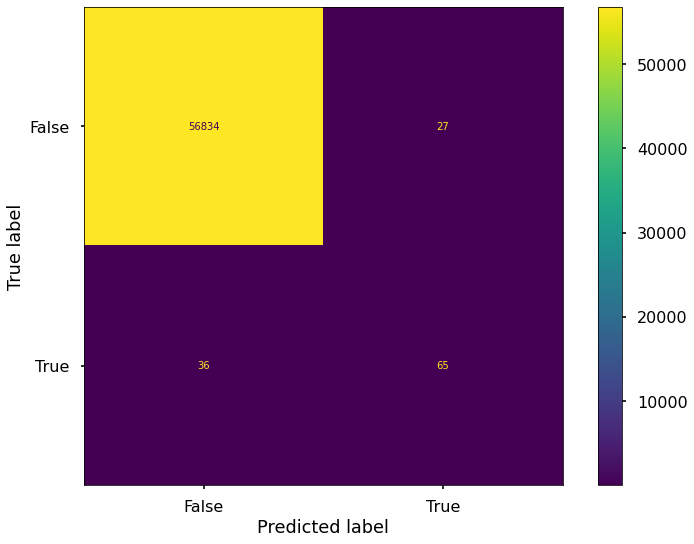

In [47]:
cm_display.plot()
plt.show()

# **Decision Tree Classifier**

In [48]:
classifier=DecisionTreeClassifier()

In [49]:
classifier.fit(X_train, y_train) 

DecisionTreeClassifier()

In [50]:
pred = classifier.predict(X_train)

In [51]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 1.0


In [52]:
# print('Accuracy from DecisionTreeClassifier for training : 0.89')

In [53]:
pred_b = classifier.predict(X_test)

In [54]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.77      0.79      0.78       101

    accuracy                           1.00     56962
   macro avg       0.88      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [55]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

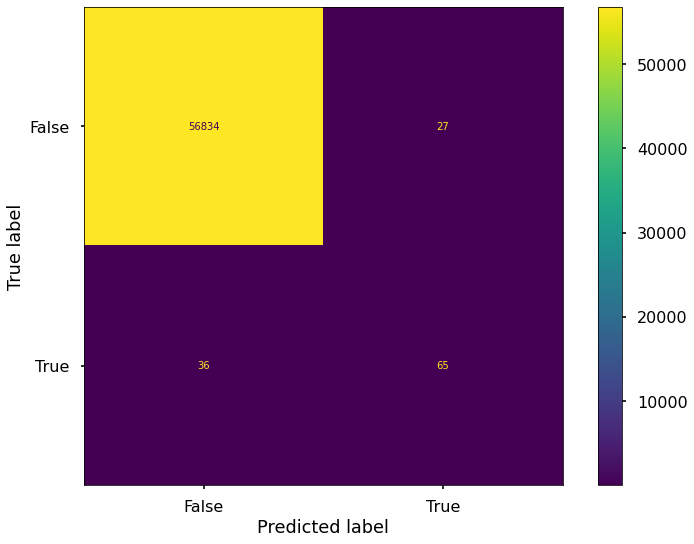

In [56]:
cm_display.plot()
plt.show()

# ***Support Vector Machine***

In [57]:
classifier=SVC()

In [58]:
classifier.fit(X_train, y_train)   

SVC()

In [59]:
pred = classifier.predict(X_train)

In [60]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.9982839210867037


In [61]:
pred_b = classifier.predict(X_test)

In [62]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.00      0.00      0.00       101

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [63]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)

In [64]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

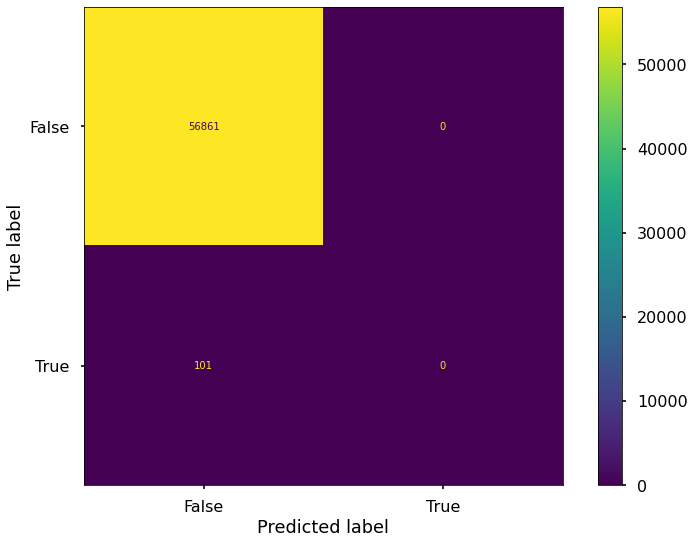

In [65]:
cm_display.plot()
plt.show()

# ***K - Nearest Neighbour***

In [66]:
classifier=KNeighborsClassifier()

In [67]:
classifier.fit(X_train, y_train)   

KNeighborsClassifier()

In [ ]:
pred = classifier.predict(X_train)

In [ ]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

In [ ]:
pred_b = classifier.predict(X_test)

In [ ]:
report= classification_report(y_test,pred_b)
print(report)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

In [ ]:
cm_display.plot()
plt.show()